## Importing Libraries.

In [5]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

## Constants.

In [6]:
IMAGE_SIZE = 256
BATCH_SIZE = 32
CHANNELS = 3
EPOCHS = 50

## Generating a tf.data.Dataset from image files in a directory.

<pre class="lang-py tfo-signature-link" translate="no" dir="ltr" is-upgraded=""><code dir="ltr"><span class="pln">tf</span><span class="pun">.</span><span class="pln">keras</span><span class="pun">.</span><span class="pln">utils</span><span class="pun">.</span><span class="pln">image_dataset_from_directory</span><span class="pun">(</span><span class="pln"><br>&nbsp; &nbsp; directory</span><span class="pun">,</span><span class="pln"><br>&nbsp; &nbsp; labels</span><span class="pun">=</span><span class="str">'inferred'</span><span class="pun">,</span><span class="pln"><br>&nbsp; &nbsp; label_mode</span><span class="pun">=</span><span class="str">'int'</span><span class="pun">,</span><span class="pln"><br>&nbsp; &nbsp; class_names</span><span class="pun">=</span><span class="kwd">None</span><span class="pun">,</span><span class="pln"><br>&nbsp; &nbsp; color_mode</span><span class="pun">=</span><span class="str">'rgb'</span><span class="pun">,</span><span class="pln"><br>&nbsp; &nbsp; batch_size</span><span class="pun">=</span><span class="lit">32</span><span class="pun">,</span><span class="pln"><br>&nbsp; &nbsp; image_size</span><span class="pun">=(</span><span class="lit">256</span><span class="pun">,</span><span class="pln"> </span><span class="lit">256</span><span class="pun">),</span><span class="pln"><br>&nbsp; &nbsp; shuffle</span><span class="pun">=</span><span class="kwd">True</span><span class="pun">,</span><span class="pln"><br>&nbsp; &nbsp; seed</span><span class="pun">=</span><span class="kwd">None</span><span class="pun">,</span><span class="pln"><br>&nbsp; &nbsp; validation_split</span><span class="pun">=</span><span class="kwd">None</span><span class="pun">,</span><span class="pln"><br>&nbsp; &nbsp; subset</span><span class="pun">=</span><span class="kwd">None</span><span class="pun">,</span><span class="pln"><br>&nbsp; &nbsp; interpolation</span><span class="pun">=</span><span class="str">'bilinear'</span><span class="pun">,</span><span class="pln"><br>&nbsp; &nbsp; follow_links</span><span class="pun">=</span><span class="kwd">False</span><span class="pun">,</span><span class="pln"><br>&nbsp; &nbsp; crop_to_aspect_ratio</span><span class="pun">=</span><span class="kwd">False</span><span class="pun">,</span><span class="pln"><br>&nbsp; &nbsp; </span><span class="pun">**</span><span class="pln">kwargs<br></span><span class="pun">)</span><span class="pln"><br></span></code></pre>

In [7]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    "PlantVillage",
    shuffle = True, #Randomly shuffle the images and load them.
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 2152 files belonging to 3 classes.


## Class Names.

In [10]:
#The class names are derived from the names of the folders in the directory specified.
class_names = dataset.class_names
class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

## Dataset Length.

In [8]:
len(dataset)
#Actual length is 68 x 32 (68 Batches of size 32 each).

68

## Display Images.

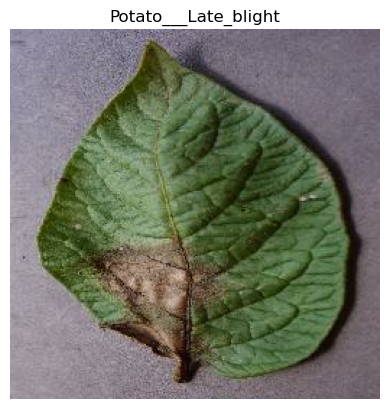

In [12]:
#dataset.take(1) == Take first Batch.

for image_batch, label_batch in dataset.take(1):
    plt.imshow(image_batch[0].numpy().astype("uint8"))
    plt.title(class_names[label_batch[0]])
    plt.axis("off")
    

## Splitting the Dataset.

In [ ]:
80% ==> training
20% ==> 10% validation, 10% test

## Calculate the size of the Training dataset from Total Length of Dataset.

In [13]:
train_size = 0.8
len(dataset)*train_size

54.400000000000006

## Take 80% of the Dataset Length for Training.

In [14]:
# Take first 54 batches (Each batch is of size 32).
# Where 54 = 80% of Dataset Length.
train_ds = dataset.take(54)
len(train_ds)

54

## Take the Remaining 20% of the total Dataset Length as Testing Data.

In [15]:
#dataset.skip(54) == skip the first 54 and take the rest.
test_ds = dataset.skip(54)
len(test_ds)

14

## Now split the Test data (20% of the Total Data) into Validation (10%) and Test(10%) data.

In [16]:
val_size = 0.1
len(dataset)*val_size

6.800000000000001

In [17]:
#Therefore Validation Data (val_ds) == first 6 Samples.
val_ds = test_ds.take(6)
len(val_ds)

6

In [18]:
#Let test_ds take the remaining samples after val_ds has taken 6%.
test_ds = test_ds.skip(6)
len(test_ds)

8

## We can also make a Function that partitions the Dataset automatically.

In [20]:
#The initial values given in the function parameters serve as default values incase the function call doesnt give the values.
def get_dataset_partitions_tf (ds , train_split = 0.8, val_split = 0.1, test_split = 0.1, shuffle = True, shuffle_size = 10000 ):
    #Total size of the dataset passed as an arguement.
    ds_size = len(ds)
    
    #If the function call was made with boolean shuffle = True.
    #Then we shuffle the Dataset to obtain different results, (NB: seed will have to be changed!)
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed = 12)
    
    train_size = int(train_split*ds_size) #int to get rid of decimals.
    val_size = int(val_split*ds_size)
    
    train_ds = ds.take(train_size) #Take first 80% as Training Data.
    
    #Then skip 80% that has been taken as training data, then out of the remaining 20% take 10% which is validation data.
    val_ds = ds.skip(train_size).take(val_size)
    
    #Now skip the 10% that was taken as validation data and use the rest as testing data.
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [33]:
#Lets test the function by calling it using the name of our Dataset (ourdatasetname == dataset)
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

print("Training Dataset = "+str(len(train_ds))+"\n","Validation Dataset = "+str(len(val_ds))+"\n","Testing Dataset = "+str(len(test_ds))+"\n","Size of Dataset = "+str(len(dataset)))

Training Dataset = 54
 Validation Dataset = 6
 Testing Dataset = 8
 Size of Dataset = 68


## Now we do caching, reading the images from the Disk and storing them in memory.